In [2]:
import pandas as pd

In [3]:
# with tarfile.open('tccon.latest.public.tgz', 'r:gz') as tar:
#     tar.extractall(path='./data')

In [4]:
import os
path = './data'

file_list = []

for root, dirs, files in os.walk(path):
    for file in files:
            file_list.append(os.path.join(root, file))

print(file_list)

['./data/pa20040602_20240225.public.qc.nc', './data/if20120823_20121201.public.qc.nc', './data/wg20130104_20230627.public.qc.nc', './data/et20161003_20240602.public.qc.nc', './data/jc20070701_20080623.public.qc.nc', './data/tk20140328_20210331.public.qc.nc', './data/ka20140115_20230626.public.qc.nc', './data/bi20090313_20181001.public.qc.nc', './data/lr20181002_20231228.public.qc.nc', './data/ny20050316_20230630.public.qc.nc', './data/js20110728_20221014.public.qc.nc', './data/so20090516_20230530.public.qc.nc', './data/gm20070718_20230504.public.qc.nc', './data/oc20110416_20240225.public.qc.nc', './data/ll20130102_20180930.public.qc.nc', './data/hf20151102_20231225.public.qc.nc', './data/ra20150301_20200718.public.qc.nc', './data/db20130101_20221227.public.qc.nc', './data/xh20180614_20230529.public.qc.nc', './data/ci20120920_20240225.public.qc.nc', './data/eu20100725_20200707.public.qc.nc', './data/lh20040628_20100219.public.qc.nc', './data/pr20140923_20231220.public.qc.nc', './data/ni

In [5]:
import xarray as xr

file_path = file_list[0]
ds = xr.open_dataset(file_path)

ds

<xarray.Dataset> Size: 2GB
Dimensions:                                       (time: 408635,
                                                   prior_altitude: 51,
                                                   ak_altitude: 51)
Coordinates:
  * time                                          (time) datetime64[ns] 3MB 2...
  * prior_altitude                                (prior_altitude) float32 204B ...
  * ak_altitude                                   (ak_altitude) float32 204B ...
Data variables: (12/93)
    prior_time                                    (time) datetime64[ns] 3MB ...
    ak_pressure                                   (ak_altitude) float32 204B ...
    ak_xco2                                       (time, ak_altitude) float32 83MB ...
    extrapolation_flags_ak_xco2                   (time) int8 409kB ...
    ak_xwco2                                      (time, ak_altitude) float32 83MB ...
    extrapolation_flags_ak_xwco2                  (time) int8 409kB ...
    ...                                            ...
    prior_xn2o                                    (time) float32 2MB ...
    prior_xco                                     (time) float32 2MB ...
    prior_xhf                                     (time) float32 2MB ...
    prior_xh2o                                    (time) float32 2MB ...
    prior_xhdo                                    (time) float32 2MB ...
    prior_xco2_x2019                              (time) float32 2MB ...
Attributes: (12/20)
    source:                      Products retrieved from solar absorption spe...
    description:                 \n------------------------------------------...
    file_creation:               Created with Python 3.7.3; the library netCD...
    title:                       Atmospheric trace gas column-average dry-air...
    data_use_policy:             https://tccon-wiki.caltech.edu/Network_Polic...
    auxiliary_data_description:  https://tccon-wiki.caltech.edu/Network_Polic...
    ...                          ...
    data_reference:              Wennberg, P. O., Roehl, C. M., Wunch, D., To...
    data_revision:               R1
    short_location:              Park Falls, Wisconsin, USA
    withheld_data:               Some time periods have been withheld due to ...
    file_format_version:         2020.B
    file_format_information:     For a description of the changes between fil...

Mean xco2: 400.0654602050781
Standard Deviation of xco2: 11.670411109924316
Min xco2: 359.92999267578125
Max xco2: 441.1300048828125


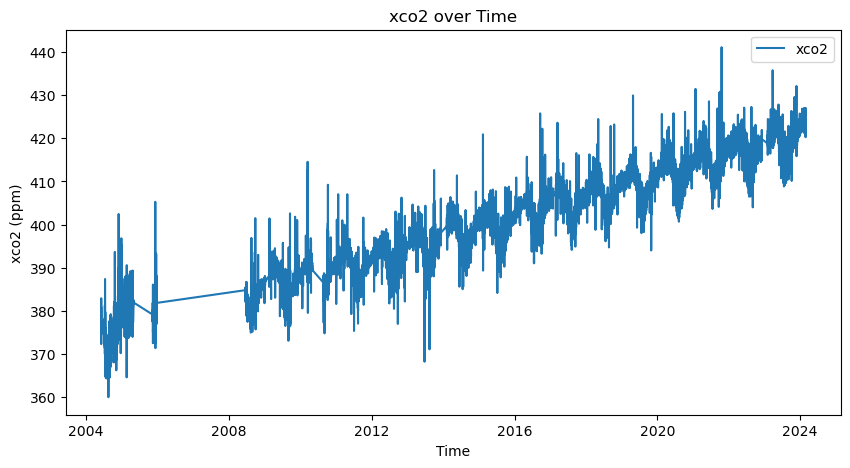

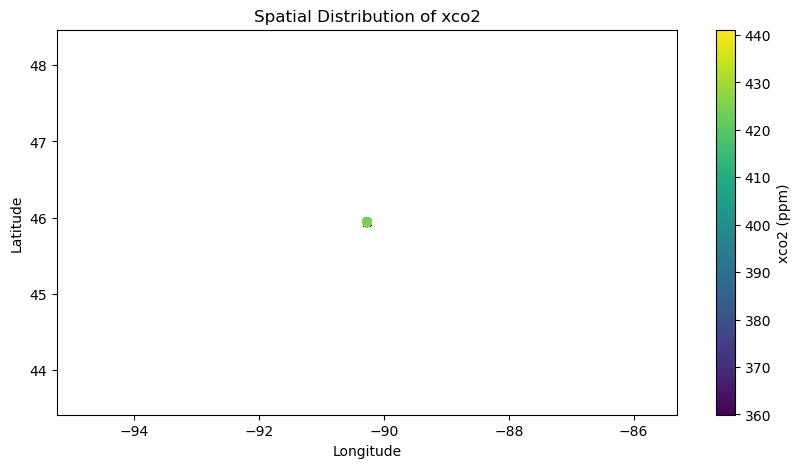

In [6]:
import matplotlib.pyplot as plt

# Example analysis on 'xco2'
variable_name = 'xco2'

# Print basic statistics of the 'xco2' data
xco2 = ds[variable_name]
print("Mean xco2:", xco2.mean().item())
print("Standard Deviation of xco2:", xco2.std().item())
print("Min xco2:", xco2.min().item())
print("Max xco2:", xco2.max().item())

# Plot the 'xco2' variable over time
plt.figure(figsize=(10, 5))
plt.plot(ds['time'], ds[variable_name], label=variable_name)
plt.xlabel('Time')
plt.ylabel(f'{variable_name} (ppm)')
plt.title(f'{variable_name} over Time')
plt.legend()
plt.show()

# Plot the spatial distribution of 'xco2'
plt.figure(figsize=(10, 5))
plt.scatter(ds['long'].values, ds['lat'].values, c=ds[variable_name].values, cmap='viridis')
plt.colorbar(label=f'{variable_name} (ppm)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Spatial Distribution of {variable_name}')
plt.show()

In [7]:
import pandas as pd

categories = {
    'x':[],
    'priorx':[],
    'prior': [],
    'ak': [],
    'error': [],
    'extrapolation_flags': [],
    'experimental':[],
    'other': []
}

for var in ds.variables:
    if var.startswith('prior_x'):
        categories['priorx'].append(var)
    elif 'experimental' in var.lower():
        categories['experimental'].append(var)
    elif var.startswith('prior_'):
        categories['prior'].append(var)
    elif var.startswith('ak_'):
        categories['ak'].append(var)
    elif 'error' in var.lower():
        categories['error'].append(var)
    elif var.startswith('extrapolation_flags'):
        categories['extrapolation_flags'].append(var)
    elif var.startswith('x'):
        categories['x'].append(var)
    else:
        categories['other'].append(var)

# for category, variables in categories.items():
#     print(f"{category} variables:")
#     for var in variables:
#         print(f"  - {var}")
#     print("\n")

pd.set_option('display.max_colwidth', None)
categories_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in categories.items()]))
categories_df = categories_df.fillna('')
categories_df


,x,priorx,prior,ak,error,extrapolation_flags,experimental,other
0,xluft,prior_xco2,prior_time,ak_altitude,xluft_error,extrapolation_flags_ak_xco2,xlco2_experimental,time
1,xhf,prior_xch4,prior_altitude,ak_pressure,xhf_error,extrapolation_flags_ak_xwco2,xlco2_error_experimental,gfit_version
2,xh2o,prior_xn2o,prior_temperature,ak_xco2,xh2o_error,extrapolation_flags_ak_xlco2,xwco2_experimental,gsetup_version
3,xhdo,prior_xco,prior_pressure,ak_xwco2,xhdo_error,extrapolation_flags_ak_xch4,xwco2_error_experimental,year
4,xco,prior_xhf,prior_density,ak_xlco2,xco_error,extrapolation_flags_ak_xhf,xwco2_experimental_x2019,day
5,xn2o,prior_xh2o,prior_h2o,ak_xch4,xn2o_error,extrapolation_flags_ak_xo2,xwco2_error_experimental_x2019,hour
6,xch4,prior_xhdo,prior_co2,ak_xhf,xch4_error,extrapolation_flags_ak_xn2o,xlco2_experimental_x2019,lat
7,xco2,prior_xco2_x2019,prior_n2o,ak_xo2,xco2_error,extrapolation_flags_ak_xco,xlco2_error_experimental_x2019,long
8,xco2_x2019,,prior_co,ak_xn2o,xco2_error_x2019,extrapolation_flags_ak_xh2o,,zobs
9,,,prior_ch4,ak_xco,,extrapolation_flags_ak_xhdo,,zmin


/tmp/ipykernel_2384900/1343072324.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/wangyaochen/miniconda3/envs/gemma/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


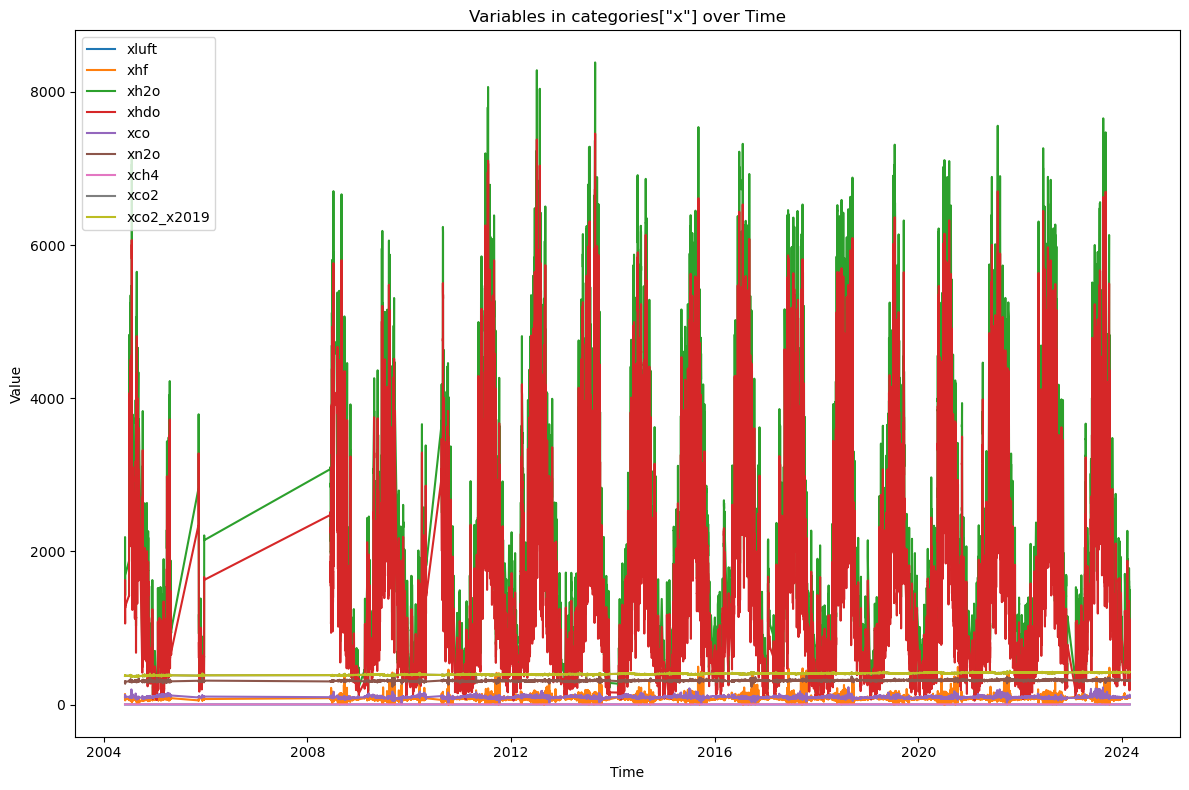

In [8]:
variables_to_plot = categories['x']  

fig, ax = plt.subplots(figsize=(12, 8))

for var in variables_to_plot:
    data = ds[var]
    time = ds['time']
    
    ax.plot(time, data, label=var)

ax.legend()
ax.set_title('Variables in categories["x"] over Time')
ax.set_xlabel('Time')
ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

In [ ]:
variables_to_plot = categories['x']

fig, axs = plt.subplots(len(variables_to_plot), 1, figsize=(12, len(variables_to_plot) * 4))

for ax, var in zip(axs, variables_to_plot):
    data = ds[var]
    time = ds['time']
    
    # 绘制数据
    data.plot(ax=ax, color='darkblue')
    ax.set_title(f'{var} over Time')
    ax.set_xlabel('Time')
    ax.set_ylabel(var)

plt.tight_layout()
plt.show()

/tmp/ipykernel_2384900/3095298820.py:10: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  c = ax.pcolormesh(data['time'], data['ak_altitude'], data.T, cmap='viridis')


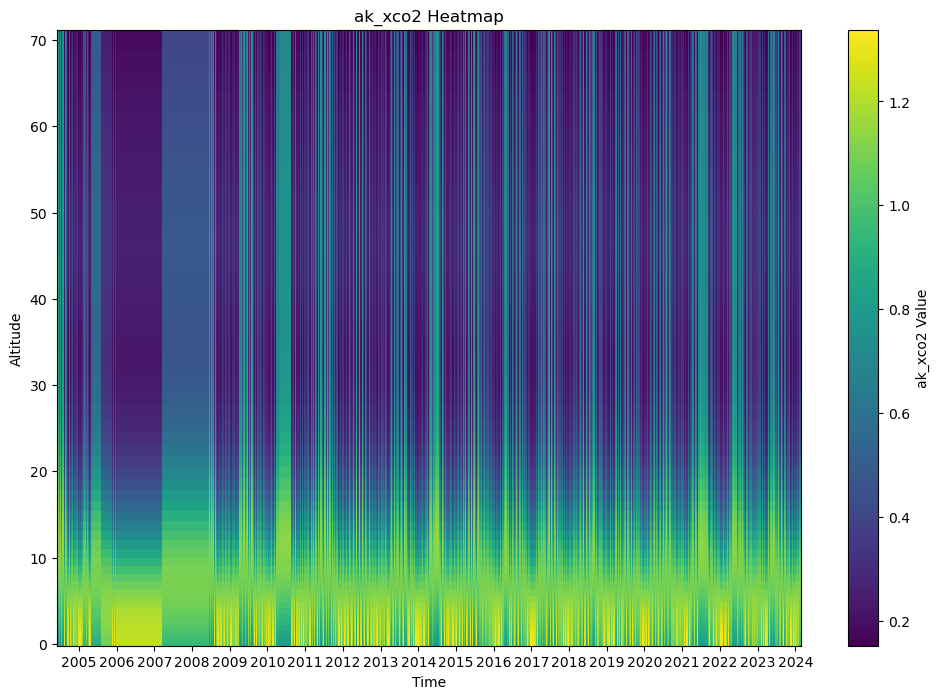

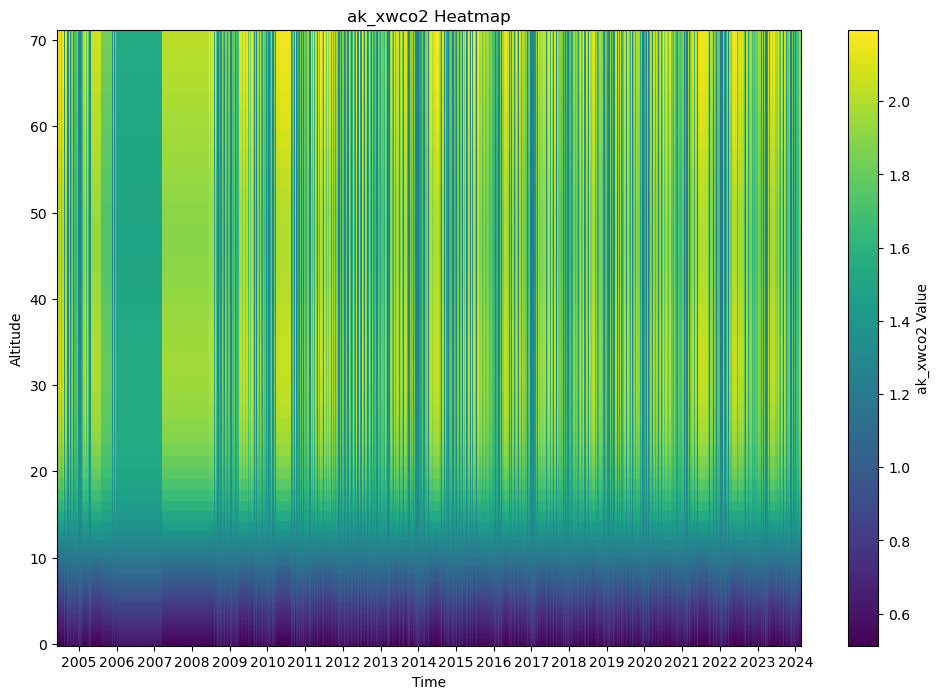

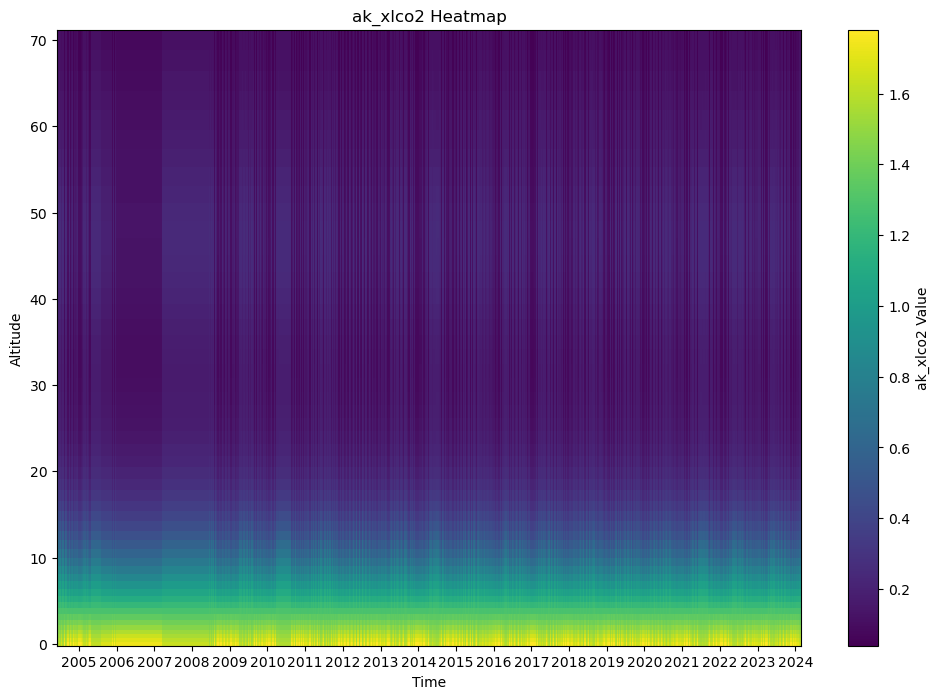

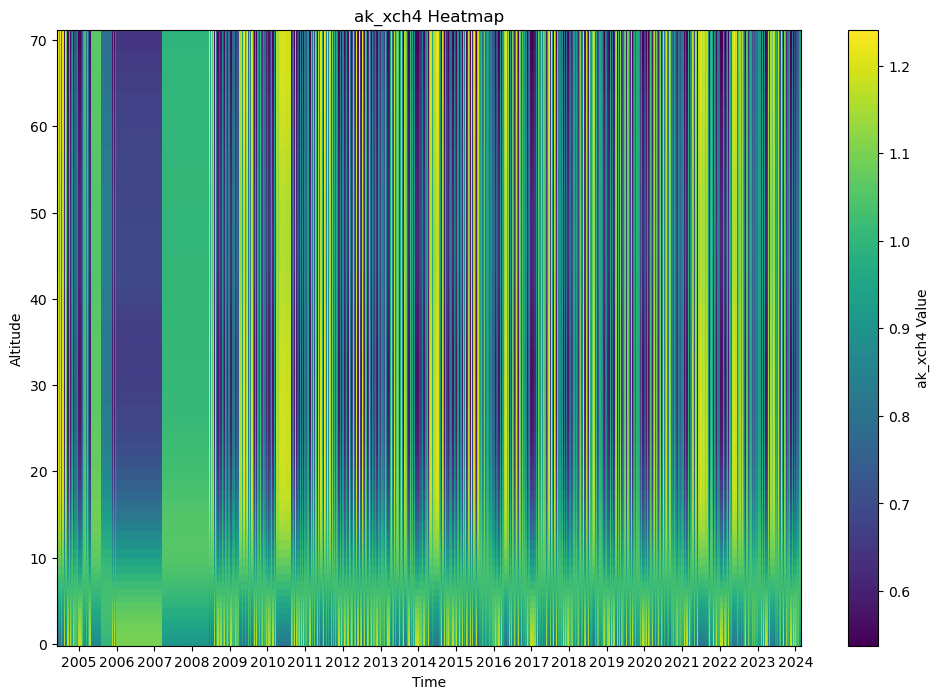

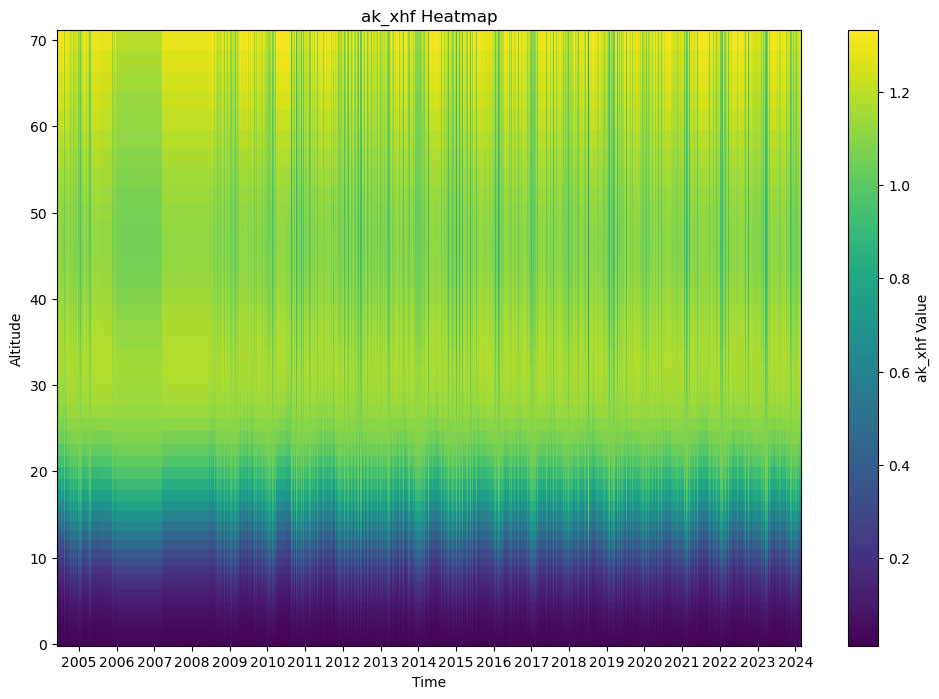

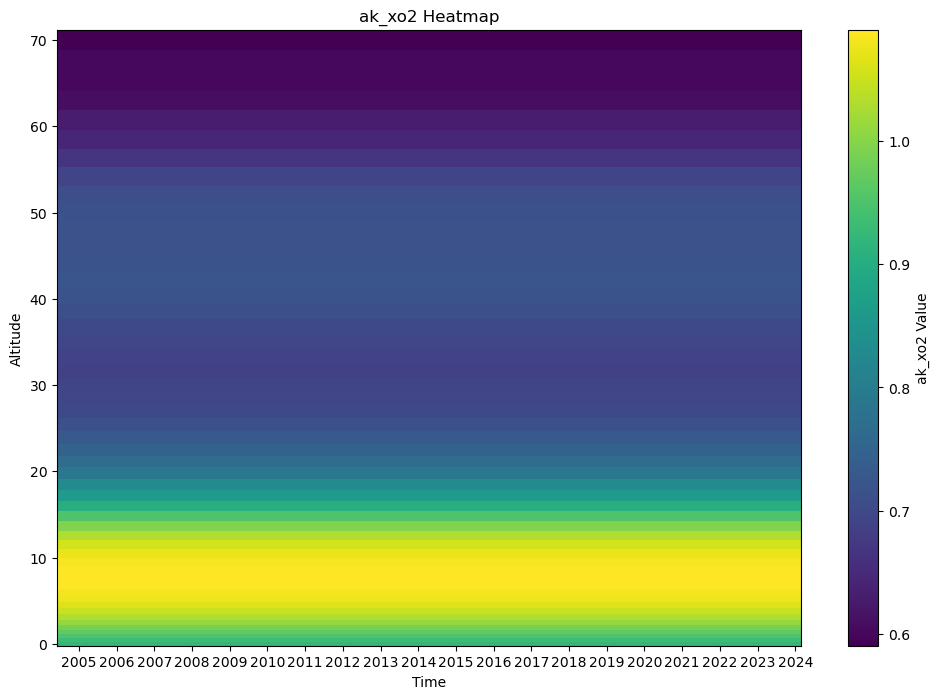

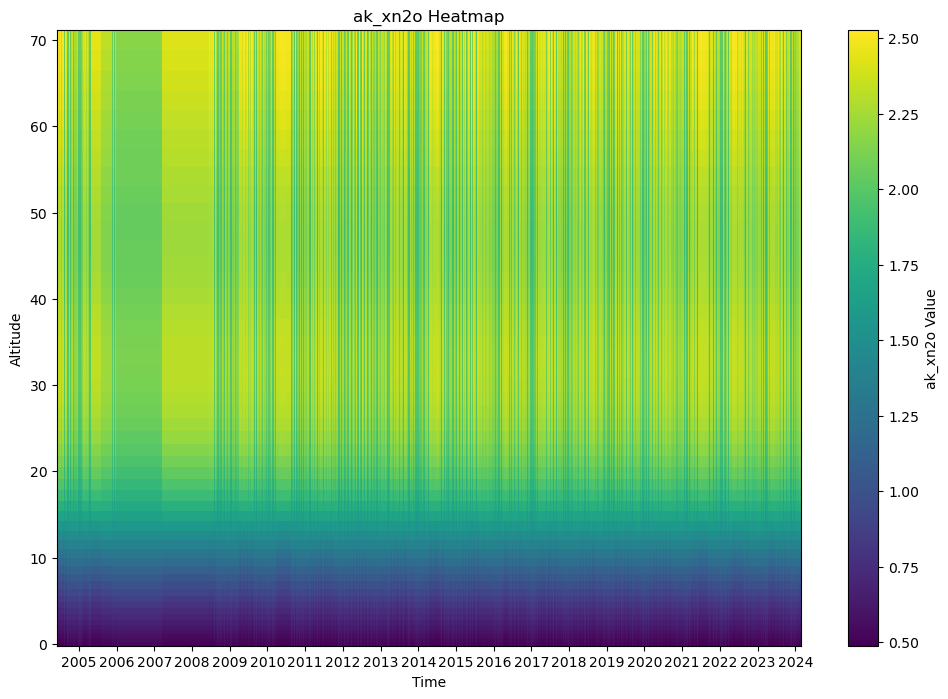

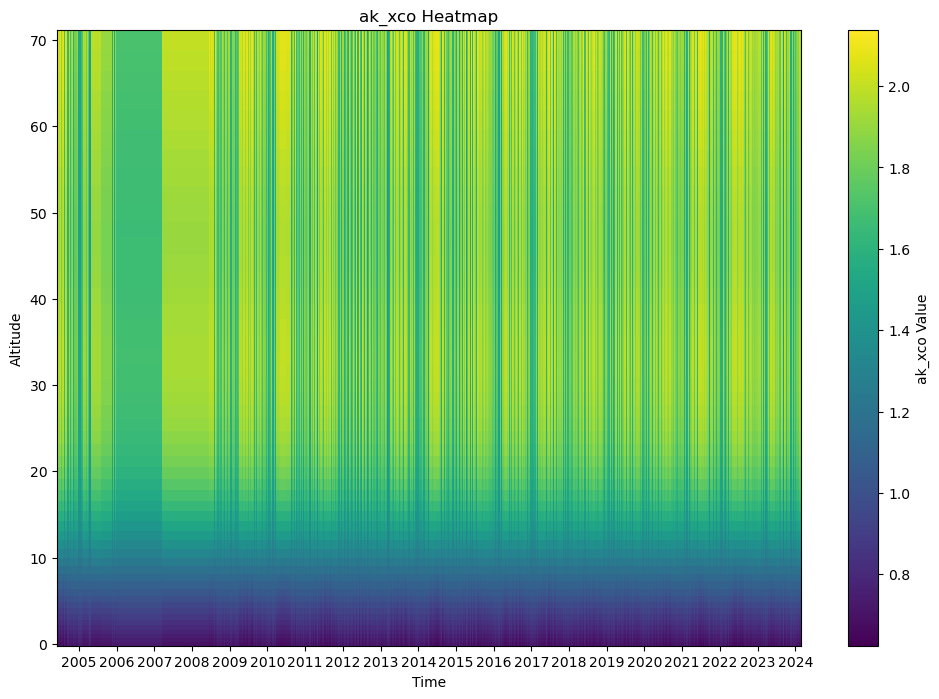

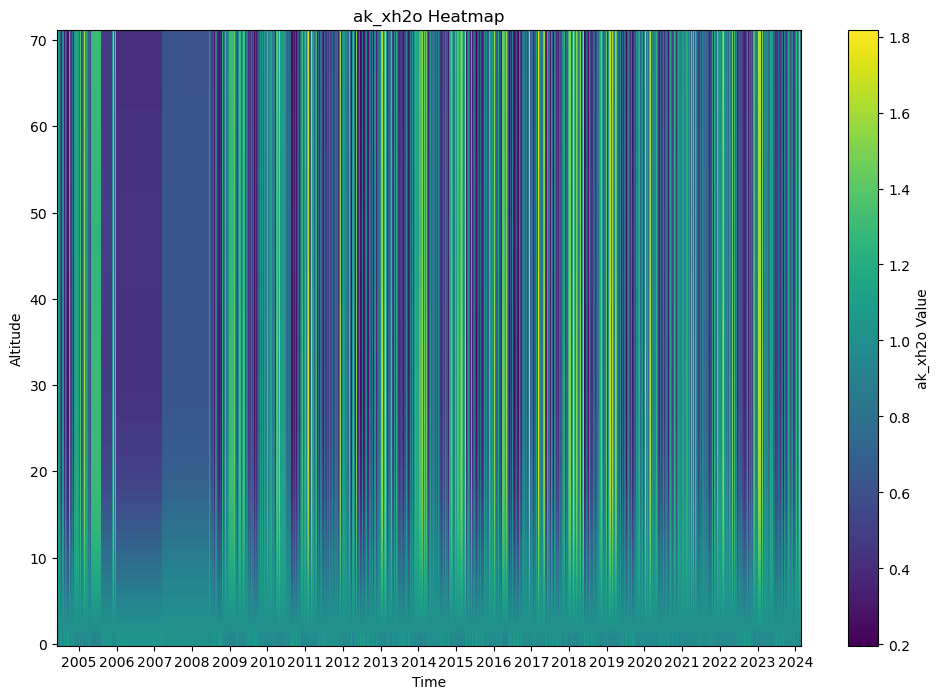

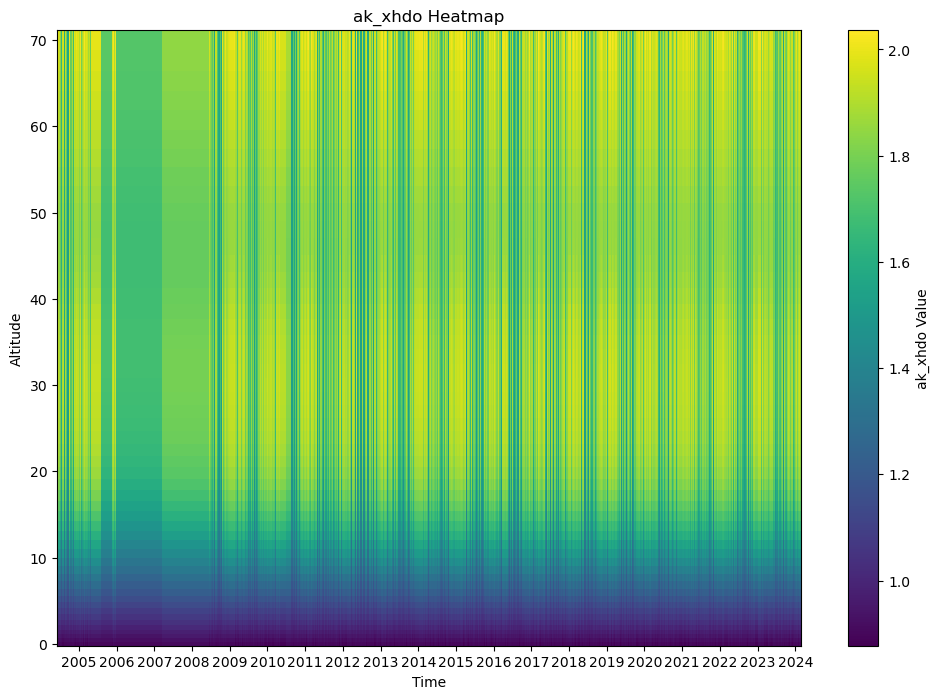

In [12]:
import matplotlib.dates as mdates
variables_to_plot = categories['ak']

variables_to_plot = [var for var in variables_to_plot if var not in ['ak_altitude', 'ak_pressure']]

for var in variables_to_plot:
    data = ds[var]
    
    fig, ax = plt.subplots(figsize=(12, 8))
    c = ax.pcolormesh(data['time'], data['ak_altitude'], data.T, cmap='viridis')
    ax.set_title(f'{var} Heatmap')
    ax.set_xlabel('Time')
    ax.set_ylabel('Altitude')
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    fig.colorbar(c, ax=ax, label=f'{var} Value')

    plt.show()